In [31]:
import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt

import sys

In [3]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [32]:
df.columns

Index([u'url', u'timedelta', u'n_tokens_title', u'n_tokens_content',
       u'n_unique_tokens', u'n_non_stop_words', u'n_non_stop_unique_tokens',
       u'num_hrefs', u'num_self_hrefs', u'num_imgs', u'num_videos',
       u'average_token_length', u'num_keywords', u'data_channel_is_lifestyle',
       u'data_channel_is_entertainment', u'data_channel_is_bus',
       u'data_channel_is_socmed', u'data_channel_is_tech',
       u'data_channel_is_world', u'kw_min_min', u'kw_max_min', u'kw_avg_min',
       u'kw_min_max', u'kw_max_max', u'kw_avg_max', u'kw_min_avg',
       u'kw_max_avg', u'kw_avg_avg', u'self_reference_min_shares',
       u'self_reference_max_shares', u'self_reference_avg_sharess',
       u'weekday_is_monday', u'weekday_is_tuesday', u'weekday_is_wednesday',
       u'weekday_is_thursday', u'weekday_is_friday', u'weekday_is_saturday',
       u'weekday_is_sunday', u'is_weekend', u'LDA_00', u'LDA_01', u'LDA_02',
       u'LDA_03', u'LDA_04', u'global_subjectivity',
       u'global_sen

In [34]:
#Removing leading blank space from all column names 

for col in df.columns: 

    if col[0]==" ": 

        df.rename(columns={col:col[1:]}, inplace = True)

# Removing Outliers

In [35]:
#Step1: Finding Median, Q1F, Q3F, Interquartile range

sorted_shares = df.sort_values('shares') 

median = sorted_shares['shares'].median() 

first_quartile = sorted_shares['shares'].quantile(q=0.25) 

third_quartile = sorted_shares['shares'].quantile(q=0.75) 

interquartile_range = third_quartile-first_quartile

In [36]:
#Finding inner fences(minor outlier) and outer fences(major outlier)
inner_boundary1 = first_quartile-(interquartile_range*1.5) #-1835.0 

inner_boundary2 = third_quartile+(interquartile_range*1.5) #5581.0 

outer_boundary1 = first_quartile-(interquartile_range*3)   #-4616.0 

outer_boundary2 = third_quartile+(interquartile_range*3)   #8362.0

print(inner_boundary1,inner_boundary2,outer_boundary1,outer_boundary2)

(-1835.0, 5581.0, -4616.0, 8362.0)


In [37]:
#Removing the outliers 

df_no_outliers = df[df["shares"]<=8362] 

mean = df_no_outliers['shares'].mean() #Without outlier treatment, mean was 3395. Removing outliers, we get 1916
mean

1916.4932888635808

# Checking Relationship between Length of Title in words and Popularity

In [45]:
#Part 1: Finding out the number of articles per disntict keyword count 

#For each token, how many articles are there? 

title_length_df = df_no_outliers.loc[:,["n_tokens_title", "shares"]]  # creating a new dataframe with length of title and number of shares

title_length_df_sorted = title_length_df.sort_values('n_tokens_title') # sorting the dataframe based on the lenght of the titles

distinct_title_keywords_count=(title_length_df_sorted.n_tokens_title.unique()) 

#distinct_title_keywords_count

numOfArticles = {} 

for token in distinct_title_keywords_count: 

    tempDf = title_length_df_sorted[title_length_df_sorted["n_tokens_title"]==token] 

    numOfArticles[token] = len(tempDf.n_tokens_title) 

numOfArticles

{2.0: 1,
 3.0: 5,
 4.0: 27,
 5.0: 170,
 6.0: 756,
 7.0: 1968,
 8.0: 3923,
 9.0: 5813,
 10.0: 6876,
 11.0: 6487,
 12.0: 4943,
 13.0: 3260,
 14.0: 1596,
 15.0: 707,
 16.0: 237,
 17.0: 81,
 18.0: 21,
 19.0: 5,
 20.0: 2,
 23.0: 1}

In [39]:
#2, 3, 4, 17, 18, 19, 20 and 23 (first 3 and last 5 tokens in NumberOfSHares) have less than 100 articles each 

#So, removing them from this specific analysis 

del_indices = [0,1,2,15,16,17,18,19] 

distinct_title_keywords_count = np.delete(distinct_title_keywords_count, del_indices)
distinct_title_keywords_count

array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.])

In [42]:
#Part 2: Finding the min, max, range of shares for every title_token 

avg_shares_per_title_length = {} 

for row in distinct_title_keywords_count:     

    df_tokenwise = title_length_df_sorted[title_length_df_sorted["n_tokens_title"]== row] 

    Avg = df_tokenwise["shares"].mean() 

    avg_shares_per_title_length[row] = Avg 

In [43]:
avg_shares_per_title_length

{5.0: 2216.323529411765,
 6.0: 2028.2843915343915,
 7.0: 2053.901422764228,
 8.0: 1973.700739230181,
 9.0: 1955.0775847238947,
 10.0: 1898.8490401396161,
 11.0: 1919.7316170803144,
 12.0: 1846.2443860004046,
 13.0: 1835.1895705521472,
 14.0: 1864.3659147869673,
 15.0: 1801.2503536067893,
 16.0: 1911.8776371308018}

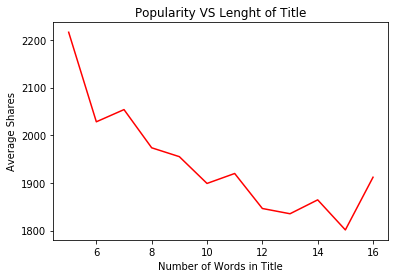

In [44]:
#Par 3 - Line Chart 

Avg_list =[] 

for token in avg_shares_per_title_length: 

    Avg_list = Avg_list + [avg_shares_per_title_length[token]] 


plt.plot(distinct_title_keywords_count, Avg_list, color='red') 

plt.xlabel('Number of Words in Title') 

plt.ylabel('Average Shares') 

plt.title('Popularity VS Lenght of Title') 

plt.show()

# Length of Article vs Popularity

In [46]:
title_cont_df = df_no_outliers.loc[:,["n_tokens_content", "shares"]] 

title_cont_df_sorted = title_cont_df.sort_values('n_tokens_content') 

distinct_content_words_count=(title_cont_df_sorted.n_tokens_content.unique()) 

 

numOfArticles_content = {} 

for token in distinct_content_words_count: 

    tempDf = title_cont_df_sorted[title_cont_df_sorted["n_tokens_content"]==token] 

    numOfArticles_content[token] = len(tempDf.n_tokens_content)
    
numOfArticles_content

{0.0: 1039,
 18.0: 1,
 21.0: 1,
 22.0: 1,
 24.0: 1,
 25.0: 1,
 26.0: 1,
 27.0: 1,
 28.0: 1,
 29.0: 1,
 31.0: 3,
 32.0: 3,
 34.0: 4,
 35.0: 2,
 37.0: 3,
 38.0: 1,
 39.0: 3,
 40.0: 2,
 41.0: 3,
 42.0: 3,
 43.0: 3,
 44.0: 1,
 45.0: 3,
 46.0: 4,
 47.0: 7,
 48.0: 4,
 49.0: 3,
 50.0: 1,
 51.0: 2,
 52.0: 1,
 53.0: 5,
 54.0: 4,
 55.0: 5,
 56.0: 6,
 57.0: 7,
 58.0: 2,
 59.0: 3,
 60.0: 6,
 61.0: 3,
 62.0: 5,
 63.0: 5,
 64.0: 3,
 65.0: 6,
 66.0: 4,
 67.0: 5,
 68.0: 10,
 69.0: 8,
 70.0: 4,
 71.0: 5,
 72.0: 8,
 73.0: 11,
 74.0: 4,
 75.0: 10,
 76.0: 15,
 77.0: 10,
 78.0: 10,
 79.0: 9,
 80.0: 15,
 81.0: 19,
 82.0: 15,
 83.0: 12,
 84.0: 9,
 85.0: 16,
 86.0: 13,
 87.0: 15,
 88.0: 14,
 89.0: 24,
 90.0: 19,
 91.0: 21,
 92.0: 14,
 93.0: 23,
 94.0: 18,
 95.0: 23,
 96.0: 29,
 97.0: 29,
 98.0: 34,
 99.0: 23,
 100.0: 26,
 101.0: 22,
 102.0: 29,
 103.0: 29,
 104.0: 29,
 105.0: 27,
 106.0: 30,
 107.0: 31,
 108.0: 19,
 109.0: 46,
 110.0: 36,
 111.0: 28,
 112.0: 32,
 113.0: 43,
 114.0: 36,
 115.0: 34,
 116.0: 46,

In [57]:
#Part 2: Making buckets based on the data distribtion 

articles_per_content = np.array([0,0,0,0,0,0,0,0]) 

shares_per_bucket = np.array([0,0,0,0,0,0,0,0]) 

for row in distinct_content_words_count:     

    if row < 100: 

        df_tokenwise =  title_cont_df_sorted[title_cont_df_sorted["n_tokens_content"]==row] 

        articles_per_content[0] = articles_per_content[0] + len(df_tokenwise.n_tokens_content) 

        shares_per_bucket[0] = shares_per_bucket[0] + df_tokenwise['shares'].sum() 

    elif row < 200:  

        df_tokenwise =  title_cont_df_sorted[title_cont_df_sorted["n_tokens_content"]==row] 

        articles_per_content[1] = articles_per_content[1] + len(df_tokenwise.n_tokens_content) 

        shares_per_bucket[1] = shares_per_bucket[1] + df_tokenwise['shares'].sum() 

    elif row < 300:  

        df_tokenwise =  title_cont_df_sorted[title_cont_df_sorted["n_tokens_content"]==row] 

        articles_per_content[2] = articles_per_content[2] + len(df_tokenwise.n_tokens_content) 

        shares_per_bucket[2] = shares_per_bucket[2] + df_tokenwise['shares'].sum() 

    elif row < 400:  

        df_tokenwise =  title_cont_df_sorted[title_cont_df_sorted["n_tokens_content"]==row] 

        articles_per_content[3] = articles_per_content[3] + len(df_tokenwise.n_tokens_content) 

        shares_per_bucket[3] = shares_per_bucket[3] + df_tokenwise['shares'].sum() 

    elif row < 500:  

        df_tokenwise =  title_cont_df_sorted[title_cont_df_sorted["n_tokens_content"]==row] 

        articles_per_content[4] = articles_per_content[4] + len(df_tokenwise.n_tokens_content) 

        shares_per_bucket[4] = shares_per_bucket[4] + df_tokenwise['shares'].sum() 

    elif row < 750:  

        df_tokenwise =  title_cont_df_sorted[title_cont_df_sorted["n_tokens_content"]==row] 

        articles_per_content[5] = articles_per_content[5] + len(df_tokenwise.n_tokens_content) 

        shares_per_bucket[5] = shares_per_bucket[5] + df_tokenwise['shares'].sum() 

    elif row < 1000:  

        df_tokenwise =  title_cont_df_sorted[title_cont_df_sorted["n_tokens_content"]==row] 

        articles_per_content[6] = articles_per_content[6] + len(df_tokenwise.n_tokens_content) 

        shares_per_bucket[6] = shares_per_bucket[6] + df_tokenwise['shares'].sum() 

    else: 

        df_tokenwise =  title_cont_df_sorted[title_cont_df_sorted["n_tokens_content"]==row] 

        articles_per_content[7] = articles_per_content[7] + len(df_tokenwise.n_tokens_content) 

        shares_per_bucket[7] = shares_per_bucket[7] + df_tokenwise['shares'].sum() 


        
mean_shares_per_bucket_content = shares_per_bucket/articles_per_content

mean_shares_per_bucket_content

array([1985, 1953, 1911, 1866, 1823, 1820, 1955, 2099])

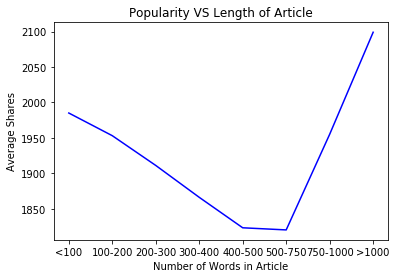

In [58]:
#Par 3 - Line Chart 

plt.plot([1,2,3,4,5,6,7,8],mean_shares_per_bucket_content, color='blue') 

plt.xticks([1,2,3,4,5,6,7,8], ['<100','100-200','200-300','300-400','400-500','500-750','750-1000','>1000']) 

plt.xlabel('Number of Words in Article') 

plt.ylabel('Average Shares') 

plt.title('Popularity VS Length of Article') 

plt.show() 

plt.clf() 

plt.cla()

# Popularity vs number of images and videos in the article

In [54]:
# len(df_no_outliers.num_imgs.unique()) 

# len(df_no_outliers.num_videos.unique()) 

 
imgs_df = df_no_outliers.loc[:,["num_imgs","shares"]] 

videos_df = df_no_outliers.loc[:,["num_videos","shares"]] 

imgs_df_sorted = imgs_df.sort_values('num_imgs') 

videos_df_sorted = videos_df.sort_values('num_videos') 

distinct_imgs_count=(imgs_df_sorted.num_imgs.unique()) 

distinct_videos_count=(videos_df_sorted.num_videos.unique()) 

 

numOfArticles_imgs = {} 

for token in distinct_imgs_count: 

    tempDf = imgs_df_sorted[imgs_df_sorted["num_imgs"]==token] 

    numOfArticles_imgs[token] = len(tempDf.num_imgs) 

     

numOfArticles_videos = {} 

for token in distinct_videos_count: 

    tempDf = videos_df_sorted[videos_df_sorted["num_videos"]==token] 

    numOfArticles_videos[token] = len(tempDf.num_videos) 
    
# numOfArticles_imgs
# numOfArticles_videos

In [59]:
#Part 2I: Making buckets for images 

imgs_per_content = np.array([0,0,0,0,0]) 

shares_per_bucket = np.array([0,0,0,0,0]) 

for row in distinct_imgs_count:     

    if row == 0: 

        df_tokenwise =  imgs_df_sorted[imgs_df_sorted["num_imgs"]==row] 

        imgs_per_content[0] = imgs_per_content[0] + len(df_tokenwise.num_imgs) 

        shares_per_bucket[0] = shares_per_bucket[0] + df_tokenwise['shares'].sum() 

    elif row == 1:  

        df_tokenwise =  imgs_df_sorted[imgs_df_sorted["num_imgs"]==row] 

        imgs_per_content[1] = imgs_per_content[1] + len(df_tokenwise.num_imgs) 

        shares_per_bucket[1] = shares_per_bucket[1] + df_tokenwise['shares'].sum() 

    elif row >1 and row <=10 :  

        df_tokenwise =  imgs_df_sorted[imgs_df_sorted["num_imgs"]==row] 

        imgs_per_content[2] = imgs_per_content[2] + len(df_tokenwise.num_imgs) 

        shares_per_bucket[2] = shares_per_bucket[2] + df_tokenwise['shares'].sum() 

    elif row >10 and row <=25:  

        df_tokenwise =  imgs_df_sorted[imgs_df_sorted["num_imgs"]==row] 

        imgs_per_content[3] = imgs_per_content[3] + len(df_tokenwise.num_imgs) 

        shares_per_bucket[3] = shares_per_bucket[3] + df_tokenwise['shares'].sum() 

    else: 

        df_tokenwise =  imgs_df_sorted[imgs_df_sorted["num_imgs"]==row] 

        imgs_per_content[4] = imgs_per_content[4] + len(df_tokenwise.num_imgs) 

        shares_per_bucket[4] = shares_per_bucket[4] + df_tokenwise['shares'].sum() 


mean_shares_per_bucket_images = shares_per_bucket/imgs_per_content 

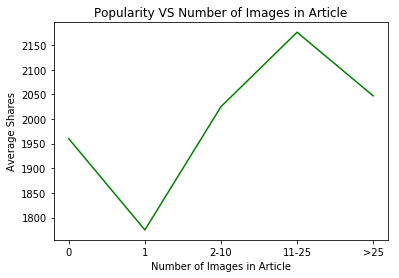

In [70]:
#Par 3I - Line Chart 

plt.plot([1,2,3,4,5],mean_shares_per_bucket_images, color='green') 

plt.xticks([1,2,3,4,5], ['0','1','2-10','11-25','>25']) 

plt.xlabel('Number of Images in Article') 

plt.ylabel('Average Shares') 

plt.title('Popularity VS Number of Images in Article') 

plt.show() 

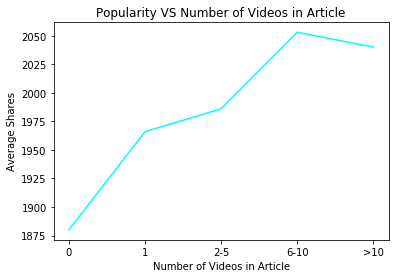

In [69]:
#Part 2V: Making buckets for Videos 

videos_per_content = np.array([0,0,0,0,0]) 

shares_per_bucket = np.array([0,0,0,0,0]) 

for row in distinct_videos_count:     

    if row == 0: 

        df_tokenwise =  videos_df_sorted[videos_df_sorted["num_videos"]==row] 

        videos_per_content[0] = videos_per_content[0] + len(df_tokenwise.num_videos) 

        shares_per_bucket[0] = shares_per_bucket[0] + df_tokenwise['shares'].sum() 

    elif row == 1:  

        df_tokenwise =  videos_df_sorted[videos_df_sorted["num_videos"]==row] 

        videos_per_content[1] = videos_per_content[1] + len(df_tokenwise.num_videos) 

        shares_per_bucket[1] = shares_per_bucket[1] + df_tokenwise['shares'].sum() 

    elif row >1 and row <=5 :  

        df_tokenwise =  videos_df_sorted[videos_df_sorted["num_videos"]==row] 

        videos_per_content[2] = videos_per_content[2] + len(df_tokenwise.num_videos) 

        shares_per_bucket[2] = shares_per_bucket[2] + df_tokenwise['shares'].sum() 

    elif row >5 and row <=10:  

        df_tokenwise =  videos_df_sorted[videos_df_sorted["num_videos"]==row] 

        videos_per_content[3] = videos_per_content[3] + len(df_tokenwise.num_videos) 

        shares_per_bucket[3] = shares_per_bucket[3] + df_tokenwise['shares'].sum() 

    else: 

        df_tokenwise =  videos_df_sorted[videos_df_sorted["num_videos"]==row] 

        videos_per_content[4] = videos_per_content[4] + len(df_tokenwise.num_videos) 

        shares_per_bucket[4] = shares_per_bucket[4] + df_tokenwise['shares'].sum() 

mean_shares_per_bucket_videos = shares_per_bucket/videos_per_content 


#Par 3V - Line Chart 

plt.plot([1,2,3,4,5],mean_shares_per_bucket_videos, color='cyan') 

plt.xticks([1,2,3,4,5], ['0','1','2-5','6-10','>10']) 

plt.xlabel('Number of Videos in Article') 

plt.ylabel('Average Shares') 

plt.title('Popularity VS Number of Videos in Article') 

plt.show() 

# Popularity vs Category 

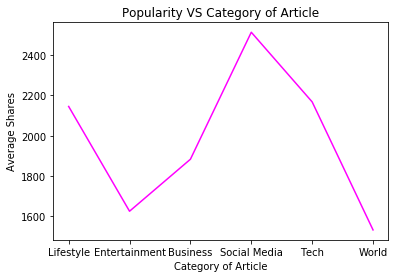

In [63]:
#There are 6 categories in the data - Lifestyle, Entertainment, Business, Social Media, Tech, World. All these articles are columns, and if an article belongs to any of these, we'll have a 1 under that. Otherwise, it will be 0 

Ctgr = ["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus","data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"] 

 
avg_shares_per_category = [] 

for category in Ctgr: 

    temp_df = df_no_outliers.loc[:, [category,"shares"]] 

    temp_df = temp_df[temp_df[category]==1] 

    avg_shares_per_category.append(temp_df["shares"].mean()) 



#Plotting categories and popularity     

plt.plot([1,2,3,4,5,6],avg_shares_per_category, color='magenta') 

plt.xticks([1,2,3,4,5,6], ["Lifestyle","Entertainment","Business", "Social Media", "Tech", "World"]) 

plt.xlabel('Category of Article') 

plt.ylabel('Average Shares') 

plt.title('Popularity VS Category of Article') 

plt.show()

# Popularity vs Weekday

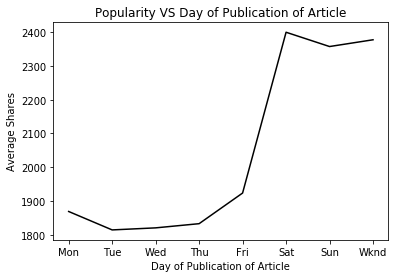

In [66]:
Days = ["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend"] 

 
avg_shares_per_day = [] 

for day in Days: 

    temp_df = df_no_outliers.loc[:, [day,"shares"]] 

    temp_df = temp_df[temp_df[day]==1] 
    
    avg_shares_per_day.append(temp_df["shares"].mean()) 


#Plotting categories and popularity     

plt.plot([1,2,3,4,5,6,7,8],avg_shares_per_day, color='black') 

plt.xticks([1,2,3,4,5,6,7,8], ["Mon","Tue","Wed", "Thu", "Fri", "Sat","Sun","Wknd"]) 

plt.xlabel('Day of Publication of Article') 

plt.ylabel('Average Shares') 

plt.title('Popularity VS Day of Publication of Article') 

plt.show() 

plt.clf() 
